# Estudo Dirigido 9

### Aluno: Daniel da Rocha Carneiro

---

#### Importações

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import skimage
from matplotlib.patches import Ellipse

In [76]:
img = cv.imread("aviao_ed.png")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

### Cálculo dos parâmetros utilizando Momentos

In [99]:
# Find contours
contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

imgHeight, imgWidth = img.shape

totalArea = 0
# Calculate area of each contour
for contour in contours:
    # Cálculo de área
    area = cv.contourArea(contour)
    totalArea = totalArea + area

    # Calculo de momentos
    M = cv.moments(contour)

    if M['m00'] != 0:  # Cortar areas iguais a zero
        centroid_x = int(M['m10'] / M['m00'])
        centroid_y = int(M['m01'] / M['m00'])

        # Calculo do momento central
        central_moments = cv.moments(contour, True)

        # Calculo da matriz de inercia
        inertia_matrix = np.array([
            [central_moments['mu20'], central_moments['mu11']],
            [central_moments['mu11'], central_moments['mu02']]
        ])


# Calculo da elipse equivalente sobre o objeto
for contour in contours:
    if len(contour) >= 5:  # Fit ellipse requires at least 5 points
        ellipse = cv.fitEllipse(contour)
        
        # Calculo da orientação do objeto
        major_axis = max(ellipse[1])
        minor_axis = min(ellipse[1])
        angle = ellipse[2]


        

print(f"A imagem tem dimensões {imgHeight} x {imgWidth}. Área total de {imgHeight*imgWidth} pixels.")
print(f"O objeto representa uma área equivalente a {totalArea} pixels.")
print(f"O centroide está nas coordenadas: ({centroid_x}, {centroid_y}).")
print(f"O objeto está orientado à {angle} graus")
print("A matriz de inércia é:")
print(inertia_matrix)
print("")
#print(f"Major Axis Length: {major_axis}")
#print(f"Minor Axis Length: {minor_axis}")





A imagem tem dimensões 609 x 863. Área total de 525567 pixels.
O objeto representa uma área equivalente a 6795.5 pixels.
O centroide está nas coordenadas: (421, 306).
O objeto está orientado à 65.42028045654297 graus
A matriz de inércia é:
[[14545949.08031654 -6806764.45707023]
 [-6806764.45707023  4889546.73524356]]



### Plot da imagem

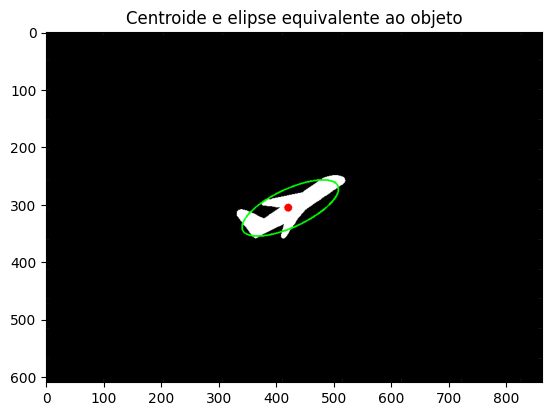

In [103]:
image_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

cv.circle(image_color, (centroid_x, centroid_y), 7, (255, 0, 0), -1)
cv.ellipse(image_color, ellipse, (0, 255, 0), 2)

plt.imshow(image_color)
plt.title("Centroide e elipse equivalente ao objeto")
plt.grid(False)